## Data Incubator Project Proposal

This project will investigate clothing items offered at the global online retail company, LightInTheBox. The main questions to be investigated are:

Are Men's and Women's clothing items are priced slightly differently for similar types of clothing items on average?

What proportion of the inventory is for plus, petite, and regular sizes? Does this reflect the demand and demographics of the population?

What items are most popular for each country?

What item materials are most popular for men and women by country?

How much inventory is there for each clothing type for LightInTheBox?

The Dataset used for this project is all Men's and Women's clothing items sold online at LightInTheBox.com- a global online retail company that offers products in apparel, small accessories and gadgets and home and garden. The data includes 43520 items, with 25930 Men's items and 17590 Women's items. The data was scraped using a web scraper to parse HTML and JSON, and is stored in an sqlite database. The LightInTheBox website was chosen due to it's large number and variety of items, accessibilty of data for scraping, and good organization of it's site for scraping.The LightInTheBox Holding Co., Ltd. takes in ~240 million in revenue annually, delivers products to consumers in over 200 countries, and has websites which are available in 26 major languages according to the company's website (http://ir.lightinthebox.com/static-files/919bdd91-9598-4465-bdf1-ec1f226a2586).

I was motivated to tackle this problem because I am very interested in retail and clothing, and I enjoy creating and designing my own clothing. I was motivated to explore LightInTheBox's data because they are a unique international brand with a lot of statistics for each item, such as fabric, Popular Countries, listing date, pattern type, garment type subcategory and trends. I am very interested in retail trends over time, and I am interested in periodic scraping to track price over time for items.

Below are figures showing some item types and distribution of items that a popular for each country.


In [136]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import plotnine as p9
from collections import Counter
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import sqlalchemy as sqla


#create SQL engine
sqlite_file = 'litb.sqlite'
litb= sqla.create_engine('sqlite:///' + sqlite_file)

#Read data from SQL database to pandas data frame
db=pd.read_sql_query("select * from clothing",litb)


In [137]:
db

,Name,Price,Gender,Fabric,Elasticity,Pattern,Fit_type,Garment_Type,Special_Size,Popular_Country,...,Nightwear_Style,Bra_Style,Bra_Category,Category,Sportswear_Category,Outerwear_Length,Production_Mode,Feel,Listing_Date,Image_URL
0,Womens Basic Polyester Fullface Protective Hat...,19.79,Womens,Polyester,N/A,Solid Colored,N/A,Hat,N/A,"Germany,Italy,France,Canada,United States",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,04/14/2020,https://li0.rightinthebox.com/images/dfp/20200...
1,Women’s Causal Plus Size Loose Blouse Solid C...,19.99,Womens,Polyester,Micro-elastic,Solid Colored,Loose,Top,Plus Size,"Germany,Sweden,United Kingdom,United States",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,https://li0.rightinthebox.com/images/dfp/20200...
2,Unisex Protection Bucket Hat Helmet antiwind a...,20.99,Mens,Polyester,N/A,Color Block,N/A,Hat,N/A,"Austria,Italy,France,Spain,United States",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,03/13/2020,https://li0.rightinthebox.com/images/dfp/20200...
3,Unisex Basic Polyester Protective Hat Solid C...,19.99,Unisex,Polyester,N/A,Solid Colored,N/A,Hat,N/A,"Austria,Portugal,Italy,France,United States",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,03/13/2020,https://li0.rightinthebox.com/images/dfp/20200...
4,Womens Yellow Blushing Pink Dress Casual Sophi...,25.87,Womens,Polyester,Inelastic,"Color Block,Solid Color",Loose,Dress,Plus Size,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,https://li0.rightinthebox.com/images/dfp/20200...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43515,Compression Gym Men‘s Normal Cotton Sexy Long ...,13.64,Mens,Cotton,Micro-elastic,Geometric,N/A,Panties,Normal,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Sexy,03/26/2020,https://li0.rightinthebox.com/images/dfp/20200...
43516,Mens Mesh Suits Nightwear Color Block Black Wh...,20.99,Mens,Polyester,Stretchy,Color Block,N/A,Nightwear,Normal,N/A,...,Suits,N/A,N/A,N/A,N/A,N/A,N/A,Sexy,03/21/2020,https://li0.rightinthebox.com/images/dfp/20200...
43517,Compression Gym Men‘s Normal Cotton Sexy Long ...,13.64,Mens,Cotton,Micro-elastic,Geometric,N/A,Panties,Normal,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Sexy,03/26/2020,https://li0.rightinthebox.com/images/dfp/20200...
43518,Mens Mesh Suits Nightwear Color Block Black Wh...,20.99,Mens,Polyester,Stretchy,Color Block,N/A,Nightwear,Normal,N/A,...,Suits,N/A,N/A,N/A,N/A,N/A,N/A,Sexy,03/21/2020,https://li0.rightinthebox.com/images/dfp/20200...


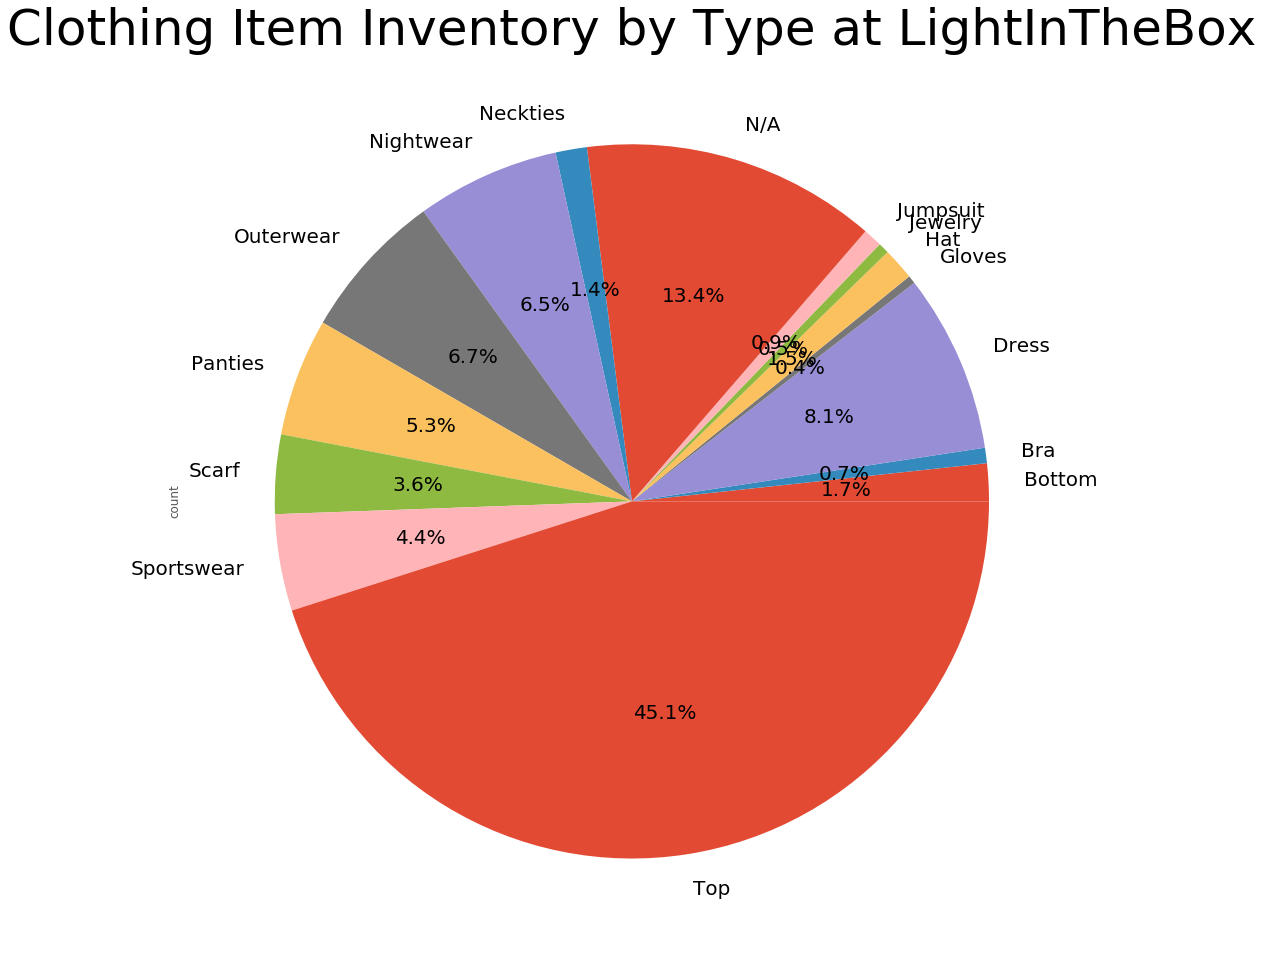

In [138]:
#Number of products by material
numitems=pd.DataFrame({'count': db.groupby(['Garment_Type']).size()}).reset_index()
numitems.count
#fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
#wedges, texts, autotexts = ax.pie(db.Fabric, autopct=lambda pct: func(pct, db.Fabric),
                                  #textprops=dict(color="w"))
#numitems=numitems[numitems['count']>500]
numitems=numitems.set_index('Garment_Type')
wedges=numitems.plot.pie(y='count',  autopct='%1.1f%%', figsize=(16, 18),textprops=dict(color="k"),fontsize=20,legend=None)


plt.title('Clothing Item Inventory by Type at LightInTheBox',fontsize=50)
plt.show()


In [139]:
#Countries
db2=db[(db.Gender=='Mens')|(db.Gender=='Womens')]

db2['United_States']=db2.Popular_Country.str.contains('United States', regex=False)
db2['France']=db2.Popular_Country.str.contains('France')
db2['Spain']=db2.Popular_Country.str.contains('Spain')
db2['China']=db2.Popular_Country.str.contains('China')
db2['Sweden']=db2.Popular_Country.str.contains('Sweden')
db2['United Kingdom']=db2.Popular_Country.str.contains('United Kingdom')
db2['Russia']=db2.Popular_Country.str.contains('Russia')
db2['Brazil']=db2.Popular_Country.str.contains('Brazil')
db2['Italy']=db2.Popular_Country.str.contains('Italy')
db2['Germany']=db2.Popular_Country.str.contains('Germany')
db2['Austria']=db2.Popular_Country.str.contains('Austria')
db2['Portugal']=db2.Popular_Country.str.contains('Portugal')
db2['India']=db2.Popular_Country.str.contains('India')
db2.Price=db2.Price.astype(float)

numlistings={}
numlistings['United_States']=db2[db2['United_States']].shape[0]
numlistings['France']=db2[db2['France']].shape[0]
numlistings['Spain']=db2[db2['Spain']].shape[0]
numlistings['China']=db2[db2['China']].shape[0]
numlistings['Sweden']=db2[db2['Sweden']].shape[0]
numlistings['United Kingdom']=db2[db2['United Kingdom']].shape[0]
numlistings['Russia']=db2[db2['Russia']].shape[0]
numlistings['Brazil']=db2[db2['Brazil']].shape[0]
numlistings['Italy']=db2[db2['Italy']].shape[0]
numlistings['Germany']=db2[db2['Germany']].shape[0]
numlistings['Austria']=db2[db2['Austria']].shape[0]
numlistings['Portugal']=db2[db2['Portugal']].shape[0]
numlistings['India']=db2[db2['India']].shape[0]
numlistings
#print('Ships with name Amistad:\n',counts[counts.shipname.str.contains('Amistad')]) #ships with name Amistad in name


C:\Users\alici\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\alici\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alici\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

{'United_States': 2967,
 'France': 1414,
 'Spain': 139,
 'China': 4,
 'Sweden': 373,
 'United Kingdom': 1123,
 'Russia': 3,
 'Brazil': 9,
 'Italy': 206,
 'Germany': 1177,
 'Austria': 164,
 'Portugal': 36,
 'India': 0}

<function matplotlib.pyplot.show(*args, **kw)>

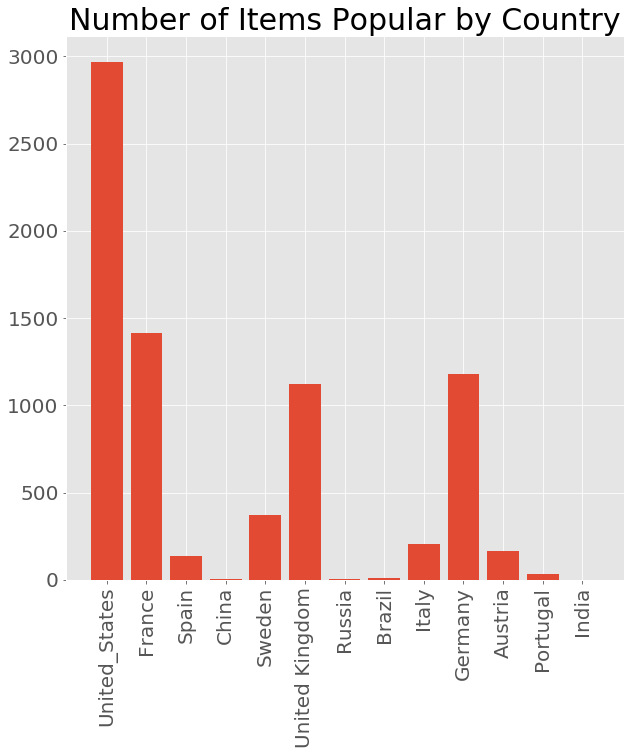

In [140]:
#pd.DataFrame(numlistings)
countries = numlistings.keys()
sizes = numlistings.values()

plt.figure(figsize=(10,10))
plt.bar(countries,sizes)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Number of Items Popular by Country',fontsize=30)
plt.show
